This is a simple machine learning project. I am using a simple datset involving pedal shapes to detect the type of flower. The primary purpose of this notebook is for me to learn : 


    # - Hyperparameter tuning
    # - Data visualisation
    # - Data analysis

In [16]:

from sklearn import svm , datasets
iris = datasets.load_iris()
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 


In [17]:
def initialise_data():
    df = pd.DataFrame(iris.data,columns=iris.feature_names)
    df['flower'] = iris.target
    df['flower'] = df['flower'].apply(lambda x : iris.target_names[x])
    return df


In [18]:
df = initialise_data()
df['flower'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [19]:
flower_dict = {
    'setosa' : 1,
    'versicolor' : 2,
    'virginica' : 3,
}

#Mapping the flower with variables for easier modelling. (similar to one hot encoding)
df['flower'].map(flower_dict)

0      1
1      1
2      1
3      1
4      1
      ..
145    3
146    3
147    3
148    3
149    3
Name: flower, Length: 150, dtype: int64

### EDA

<Axes: xlabel='flower', ylabel='count'>

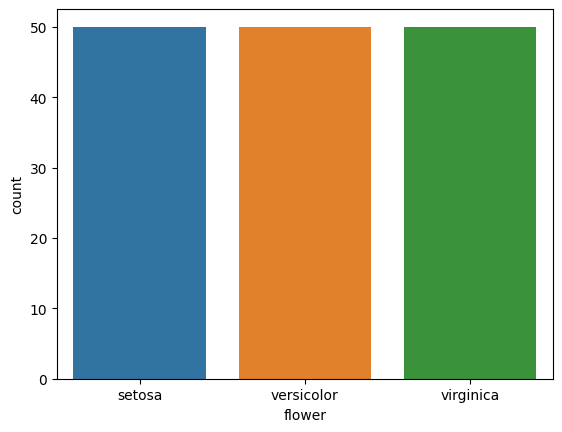

In [20]:
sns.countplot(x='flower', data=df)


It seems that the data is well balanced!.

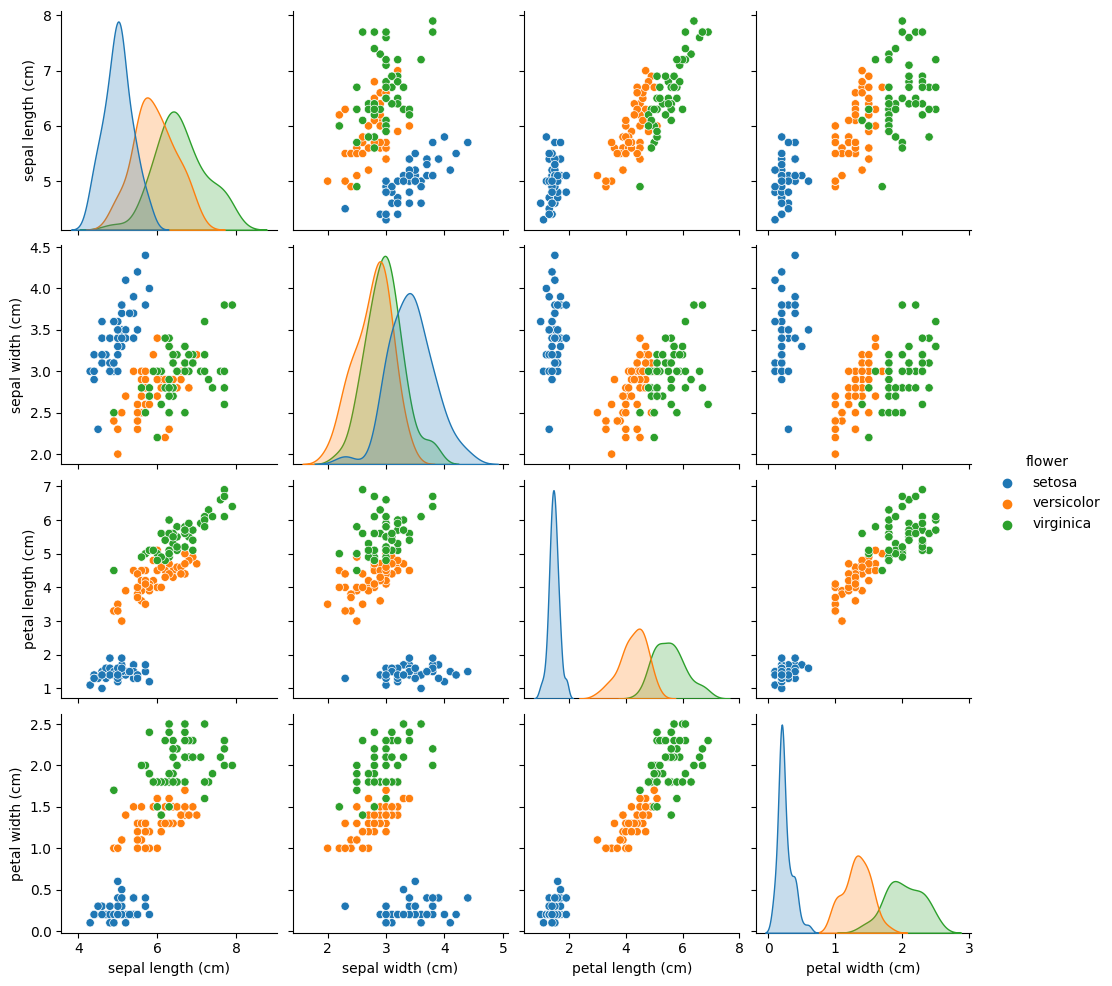

In [21]:
#Pairplot to get the correlation among the 4 features.
sns.pairplot(df, hue='flower')
plt.show()

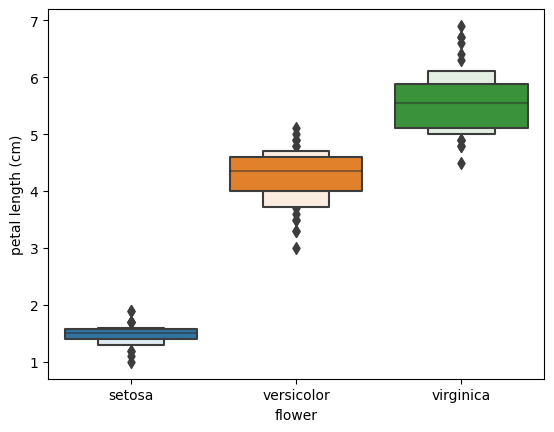

It seems that the best way to cluster the results is by using pedal length and pedal width

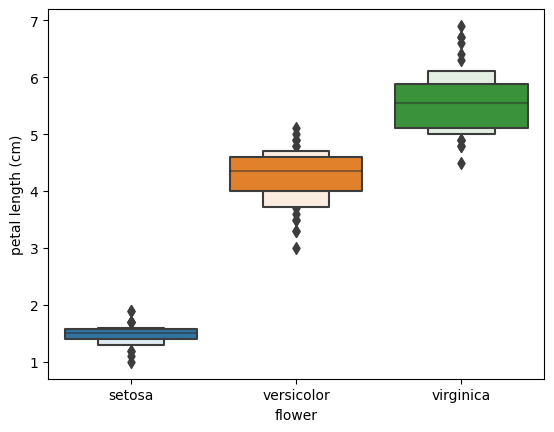

In [23]:
sns.boxenplot(x = 'flower', y = 'petal length (cm)', data = df)
plt.show()

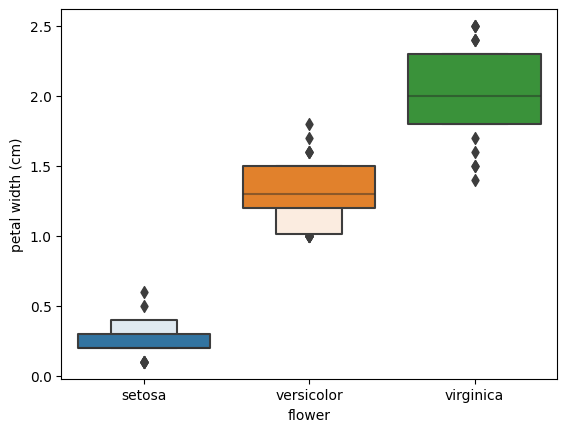

In [27]:
sns.boxenplot(x = 'flower', y = 'petal width (cm)', data = df)
plt.show()

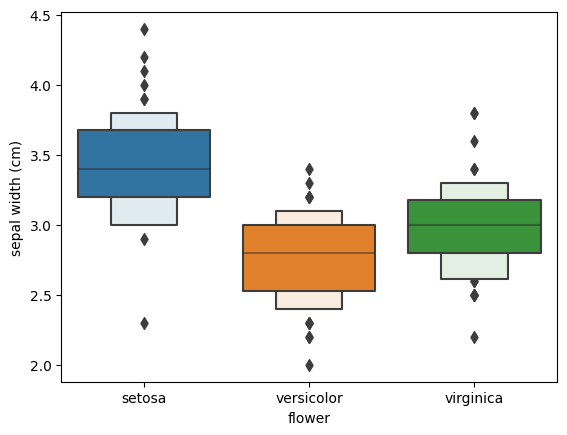

In [28]:
sns.boxenplot(x = 'flower', y = 'sepal width (cm)', data = df)
plt.show()

In [7]:
dependant = df.pop('flower')
independant = df

### Model Evaluation

### Model - Logistic regression



In [42]:
import mlflow  ## Using mlflow to track my experiments
from sklearn.linear_model import LogisticRegression     
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(independant,dependant,test_size=0.3)

In [44]:
## Grid search  
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(LogisticRegression(),{
 
 "C" : [0.1,1,10],
 'penalty':['l1','l2'],
 'solver':['liblinear','saga'],
 'fit_intercept':[True,False],
 'max_iter': [100,200,500],



}
)




In [45]:
clf.fit(independant,dependant)
grid_results = pd.DataFrame(clf.cv_results_)
grid_results.sort_values('rank_test_score')

2023/06/21 02:46:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c413d1ac92f24d3a99209929c61f2da1', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
c:\Users\Harish Vasanth\Desktop\Machine-learning-projects\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Harish Vasanth\Desktop\Machine-learning-projects\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Harish Vasanth\Desktop\Machine-learning-projects\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Harish Vasanth\Desktop\Machine-learning-projects\.venv\Lib\site-packages\sklear

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_fit_intercept,param_max_iter,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
29,0.010903,0.002914,0.002461,0.002208,1,True,200,l1,saga,"{'C': 1, 'fit_intercept': True, 'max_iter': 20...",1.0,1.0,0.966667,0.966667,1.000000,0.986667,0.016330,1
27,0.001505,0.003010,0.004822,0.003938,1,True,100,l2,saga,"{'C': 1, 'fit_intercept': True, 'max_iter': 10...",1.0,1.0,0.966667,0.966667,1.000000,0.986667,0.016330,1
25,0.009604,0.003243,0.000000,0.000000,1,True,100,l1,saga,"{'C': 1, 'fit_intercept': True, 'max_iter': 10...",1.0,1.0,0.966667,0.966667,1.000000,0.986667,0.016330,1
35,0.022612,0.007713,0.004886,0.003994,1,True,500,l2,saga,"{'C': 1, 'fit_intercept': True, 'max_iter': 50...",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,4
55,0.008041,0.000093,0.001616,0.003233,10,True,200,l2,saga,"{'C': 10, 'fit_intercept': True, 'max_iter': 2...",1.0,1.0,0.966667,0.933333,1.000000,0.980000,0.026667,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,0.007364,0.003801,0.001628,0.003257,0.1,False,200,l1,liblinear,"{'C': 0.1, 'fit_intercept': False, 'max_iter':...",0.7,0.8,0.800000,0.800000,0.766667,0.773333,0.038873,67
8,0.003876,0.004191,0.001618,0.003237,0.1,True,500,l1,liblinear,"{'C': 0.1, 'fit_intercept': True, 'max_iter': ...",0.7,0.8,0.800000,0.800000,0.766667,0.773333,0.038873,67
20,0.003105,0.002992,0.002447,0.002924,0.1,False,500,l1,liblinear,"{'C': 0.1, 'fit_intercept': False, 'max_iter':...",0.7,0.8,0.800000,0.800000,0.766667,0.773333,0.038873,67
4,0.004269,0.002757,0.000757,0.000943,0.1,True,200,l1,liblinear,"{'C': 0.1, 'fit_intercept': True, 'max_iter': ...",0.7,0.8,0.800000,0.800000,0.766667,0.773333,0.038873,67


In [49]:
mlflow.autolog()
with mlflow.start_run(): ##Store the optimum run
    mlflow.set_tag("developer","HarishV")
    mlflow.set_tag("Exp Name","IrisPrediction")

    clf = LogisticRegression(C=1 , penalty='l1',solver="saga",max_iter=200 , fit_intercept=True)
    clf.fit(X_train,Y_train)
    clf.score(X_test,Y_test)    
    mlflow.log_metric("accuracy", clf.score(X_test,Y_test))
    


2023/06/21 02:50:09 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
c:\Users\Harish Vasanth\Desktop\Machine-learning-projects\.venv\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Model - KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
mlflow.autolog(disable=True)

In [55]:
clf = GridSearchCV(KNeighborsClassifier(n_neighbors=3),
{
    "algorithm" : ["ball_tree","kd_tree","brute"],
    "leaf_size" : [10,20,30,40]
    }, cv=5
)

clf.fit(independant,dependant)
df = pd.DataFrame(clf.cv_results_)
df.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006168,0.001632,0.004590,0.003045,ball_tree,10,"{'algorithm': 'ball_tree', 'leaf_size': 10}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
1,0.001755,0.003138,0.006512,0.003263,ball_tree,20,"{'algorithm': 'ball_tree', 'leaf_size': 20}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
2,0.001545,0.003090,0.004797,0.003917,ball_tree,30,"{'algorithm': 'ball_tree', 'leaf_size': 30}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
3,0.001620,0.003240,0.003190,0.003907,ball_tree,40,"{'algorithm': 'ball_tree', 'leaf_size': 40}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
4,0.003200,0.003919,0.001601,0.003203,kd_tree,10,"{'algorithm': 'kd_tree', 'leaf_size': 10}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
5,0.000000,0.000000,0.003262,0.004011,kd_tree,20,"{'algorithm': 'kd_tree', 'leaf_size': 20}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
6,0.001587,0.003173,0.001619,0.003238,kd_tree,30,"{'algorithm': 'kd_tree', 'leaf_size': 30}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
7,0.001585,0.003169,0.003197,0.003915,kd_tree,40,"{'algorithm': 'kd_tree', 'leaf_size': 40}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
8,0.002255,0.003159,0.006497,0.003256,brute,10,"{'algorithm': 'brute', 'leaf_size': 10}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
9,0.001348,0.000876,0.007395,0.000643,brute,20,"{'algorithm': 'brute', 'leaf_size': 20}",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1


In [56]:
mlflow.autolog()
with mlflow.start_run(): ##Store the optimum run
    mlflow.set_tag("developer","HarishV")
    mlflow.set_tag("Exp Name","IrisPrediction")
    clf = KNeighborsClassifier(n_neighbors=3,algorithm = 'ball_tree', leaf_size =  10)
    clf.fit(X_train,Y_train)
    clf.score(X_test,Y_test)    
    mlflow.log_metric("accuracy", clf.score(X_test,Y_test))

2023/06/21 02:56:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.


## Model - Random forrest 🌳

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf = GridSearchCV(RandomForestClassifier(),
{
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10],
    'bootstrap': [True, False]

    }
)

clf.fit(independant,dependant)
df = pd.DataFrame(clf.cv_results_)
df.sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.140454,0.029604,0.008694,0.004162,True,None,100,"{'bootstrap': True, 'max_depth': None, 'n_esti...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
15,0.276961,0.025747,0.019705,0.002720,False,10,100,"{'bootstrap': False, 'max_depth': 10, 'n_estim...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
14,1.293178,0.018936,0.102009,0.005357,False,5,500,"{'bootstrap': False, 'max_depth': 5, 'n_estima...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
13,0.642088,0.104570,0.062571,0.036947,False,5,200,"{'bootstrap': False, 'max_depth': 5, 'n_estima...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
10,0.189749,0.016422,0.015226,0.002608,False,None,200,"{'bootstrap': False, 'max_depth': None, 'n_est...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
7,0.238986,0.003254,0.017374,0.002772,True,10,200,"{'bootstrap': True, 'max_depth': 10, 'n_estima...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
8,0.616808,0.045404,0.036475,0.007587,True,10,500,"{'bootstrap': True, 'max_depth': 10, 'n_estima...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
5,0.616142,0.020603,0.042842,0.010865,True,5,500,"{'bootstrap': True, 'max_depth': 5, 'n_estimat...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
4,0.262981,0.027939,0.018851,0.003145,True,5,200,"{'bootstrap': True, 'max_depth': 5, 'n_estimat...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1
3,0.126638,0.013097,0.008507,0.000746,True,5,100,"{'bootstrap': True, 'max_depth': 5, 'n_estimat...",0.966667,0.966667,0.933333,0.966667,1.0,0.966667,0.021082,1


0.9333333333333333

NameError: name 'svm' is not defined